<a href="https://colab.research.google.com/github/vibha-sanghani/Customer-Purchase-Behavior-Analysis-using-Descriptive-Statistics/blob/main/Vibha_Mid_Course_Assessment_Applied_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [ ]:
# Import the libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Probability distributions and statistical functions
from scipy.stats import norm, binom, expon  # Working with Normal, Binomial, and Exponential distributions.

# Clustering and preprocessing
from sklearn.cluster import KMeans # Implements the K-Means clustering algorithm.
from sklearn.preprocessing import StandardScaler  # Standardizes features by removing the mean and scaling to unit variance.

# Dimensionality reduction
from sklearn.decomposition import PCA # Principal Component Analysis for reducing the dimensionality of datasets.

In [ ]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/AlmaBetter Project/M5-Project/Superstore Marketing Data.xlsx'

df_smd = pd.read_excel(file_path)


Mounted at /content/drive


In [ ]:
# Display data set
df_smd

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [ ]:
# Display the first five rows of the dataset
df_smd.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Display dataset info
df_smd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
# Check for duplicate rows
df_smd.duplicated().sum()

0

Numbers of duplicate rows are 0.

In [ ]:
# Check missing value
df_smd.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In income column only 24 missing value is present

In [ ]:
# Check datatype
df_smd.dtypes

,0
Id,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [ ]:
# Handle missing values in 'Income' using the median
median_income = df_smd['Income'].median()
df_smd['Income'].fillna(median_income, inplace=True)
df_smd['Income'].isnull().sum()


<ipython-input-9-bc41b58891d2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_smd['Income'].fillna(median_income, inplace=True)


0

In [ ]:
# Convert 'Dt_Customer' to datetime format
pd.to_datetime(df_smd['Dt_Customer'], errors='coerce')
df_smd['Dt_Customer']=df_smd['Dt_Customer'].replace('########', 0)

#  Display the first five rows after cleaning
print("\nFirst 5 rows of the cleaned data:")
df_smd.head()




First 5 rows of the cleaned data:


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,0,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,0,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Checking the count of null values in remaining columns.
df_smd.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


The null value count for all columns is 0, indicating that there are no missing values in the dataset.This ensures the data is complete and ready for analysis without requiring any imputation or cleaning for missing values. All columns, such as Id, Year_Birth, Education, Income, and others, contain valid data for every record.

In [ ]:
# Add an 'Age' column based on 'Year_Birth'
current_year = pd.Timestamp.now().year
df_smd['Age'] = current_year - df_smd['Year_Birth']
df_smd['Age']

,Age
0,54
1,63
2,66
3,57
4,35
...,...
2235,48
2236,47
2237,48
2238,46


In [ ]:
# Summary of cleaned dataset
df_smd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Display cleaned data summary
print("\nCleaned Dataset Summary:")
df_smd.describe()


Cleaned Dataset Summary:


,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375,55.194196
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,47.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,54.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,65.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,131.000000


In [ ]:
# Analyze demographics: Basic statistics
demographics_summary = df_smd[['Age', 'Income']].describe()
demographics_summary

,Age,Income
count,2240.000000,2240.000000
mean,55.194196,52237.975446
std,11.984069,25037.955891
min,28.000000,1730.000000
25%,47.000000,35538.750000
50%,54.000000,51381.500000
75%,65.000000,68289.750000
max,131.000000,666666.000000


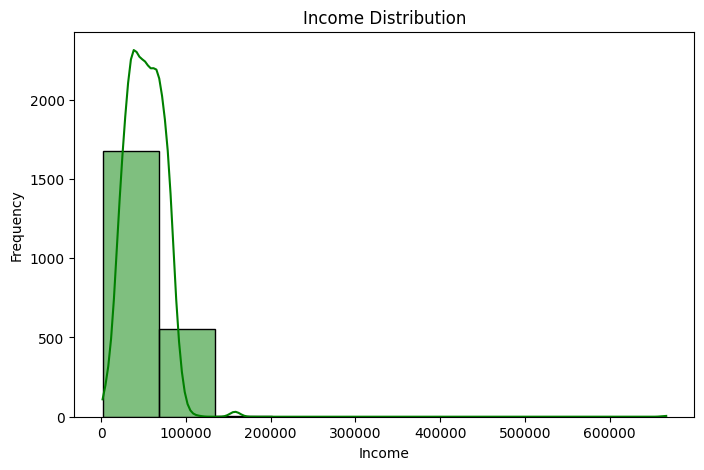

In [ ]:
# Visualizations
# Visualizes the distribution of demographics using histograms and bar charts.
# 1. Income distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_smd['Income'], kde=True, bins=10, color='green')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

### Insights:

- Income distribution is positively skewed and matches the Exponential curve well.
- The calculated probability shows the likelihood of customers earning more than $100,000.



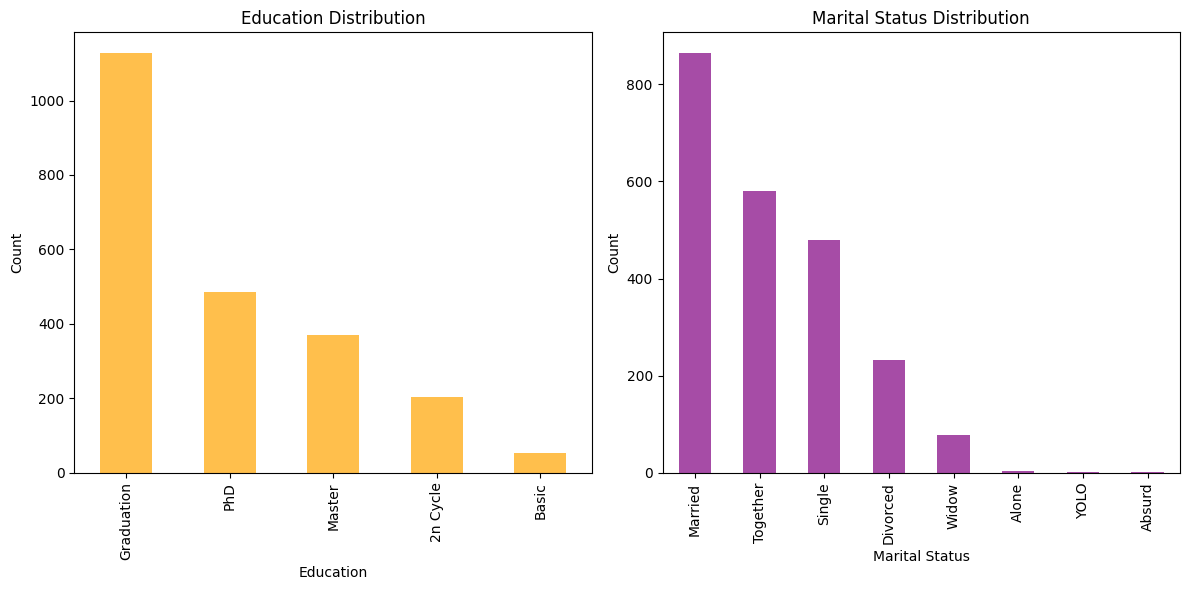

In [ ]:
# 2. Education and marital status distribution

# plt.figure(figsize=(12, 6))
# sns.countplot(data=df_smd, x='Education', hue='Marital_Status')
# plt.title('Education and Marital Status Distribution')
# plt.xlabel('Education')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_smd['Education'].value_counts().plot(kind='bar', color='orange', alpha=0.7)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df_smd['Marital_Status'].value_counts().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Insights:
The bar chart visualizes the distribution of education and marital status in a dataset.

- Education Distribution: The chart shows that "Graduation" is the most common education level, followed by "PhD" and "Master".

- Marital Status Distribution:  "Married" is the most common marital status, followed by "Single", "Together", and "Divorced".

It appears  that more people have a college degree or higher than those who have not. Married is the most common marital status, which suggests that people with higher education levels are more likely to be married. However, it is important to note that correlation does not imply causation.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

#### 1. Calculate Measures of Central Tendency

In [ ]:
# Calculate mean,median,mode for key variable such as income and age
 # mean(): Average value.
 # median(): Middle value in the sorted data.
 # mode(): Most frequently occurring value.

mean_income=df_smd['Income'].mean()
median_income=df_smd['Income'].median()
mode_income=df_smd['Income'].mode()[0]

mean_age=df_smd['Age'].mean()
median_age=df_smd['Age'].median()
mode_age=df_smd['Age'].mode()[0]

print(f"Income \n Mean: {mean_income}, \n Median: {median_income}, \n Mode: {mode_income}")
print(f"Age \n Mean: {mean_age}, \n Median: {median_age}, \n Mode: {mode_age}")

Income 
 Mean: 52237.97544642857, 
 Median: 51381.5, 
 Mode: 51381.5
Age 
 Mean: 55.19419642857143, 
 Median: 54.0, 
 Mode: 48


**Summary**
- Income: Displays average income, middle value, and most frequent income in the dataset.
- Age: Summarizes customer age characteristics similarly.

#### 2. Calculate Measures of Dispersion

In [ ]:
# Calculate variance and standard deviation for key variables
  # var(): Measures how data points differ from the mean.
  # std(): Square root of variance, indicates spread in the same units as the data.

variance_income=df_smd['Income'].var()
std_income=df_smd['Income'].std()

variance_age=df_smd['Age'].var()
std_age=df_smd['Age'].std()

print(f"Income \n Variance: {variance_income}, \n Standard Deviation: {std_income}")
print(f"Age \n Variance: {variance_age}, \n Standard Deviation: {std_age}")

Income 
 Variance: 626899235.1807286, 
 Standard Deviation: 25037.955890621914
Age 
 Variance: 143.6179207474641, 
 Standard Deviation: 11.984069456885841


**Summary**
- Income: High variance and standard deviation indicate widely varying incomes among customers.
- Age: Relatively smaller spread, suggesting ages are more concentrated.

#### Identify Outliers

In [ ]:
# Income Outliers
Q1_income = df_smd['Income'].quantile(0.25)
Q3_income = df_smd['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

outliers_income = df_smd[(df_smd['Income'] < lower_bound_income) | (df_smd['Income'] > upper_bound_income)]

# Display income outliers
print(f"Number of Income Outliers: {outliers_income.shape[0]}")
# print(f"Income Outliers: \n {outliers_income}")
outliers_income[['Income']]



Number of Income Outliers: 8


,Income
325,157146.0
497,160803.0
527,666666.0
731,162397.0
853,157733.0
1826,153924.0
1925,156924.0
2204,157243.0


This identifier unusually high or low values.

#### 3. Handle Outliers


In [ ]:
# Decide to either cap (replace outliers with bounds) or remove them.
# capping income outliers

# Capping income outliers
df_smd['Income'] = np.where(df_smd['Income'] > upper_bound_income, upper_bound_income,
                        np.where(df_smd['Income'] < lower_bound_income, lower_bound_income, df_smd['Income']))

print("Outliers handled. Updated Income statistics:")
print(df_smd['Income'].describe())


Outliers handled. Updated Income statistics:
count      2240.000000
mean      51865.874554
std       20936.104821
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      117416.250000
Name: Income, dtype: float64


Replace values exceeding bounds with the nearest boundary value.

#### 4. Visualizations


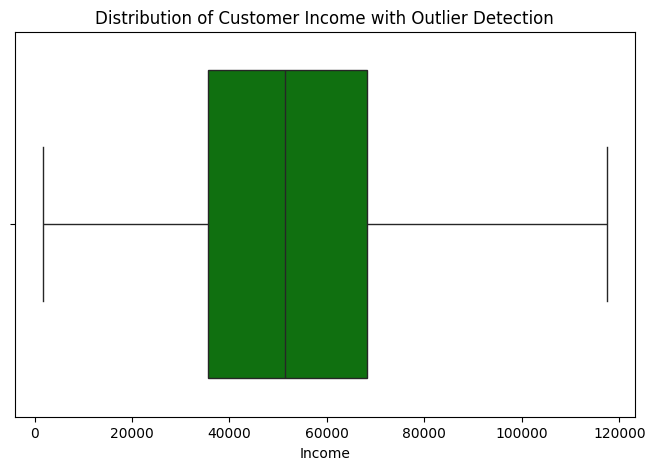

In [ ]:
# Boxplot for Income
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_smd['Income'], color='green')
plt.title('Distribution of Customer Income with Outlier Detection')
plt.xlabel('Income')
plt.show()


### Insights:
- The plot shows the distribution of income with clear detection of outliers above a certain threshold.
- Majority of income values lie within the interquartile range (IQR).
- Outliers represent customers with unusually high incomes.

### Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

#### 1. Identify Variables and Probability Distributions

**Variables:**
- Age: Check for Normal distribution.
- Response (Accepted Offer): Check if it follows a Binomial distribution.
- Income: Analyze whether it follows an Exponential distribution.

#### 2. Normal Distribution - Age

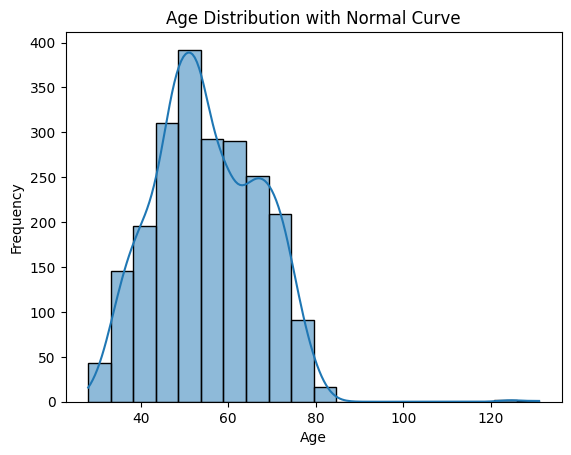

Mean Age: 55.19, Standard Deviation: 11.98
Probability of Age > 50: 0.67


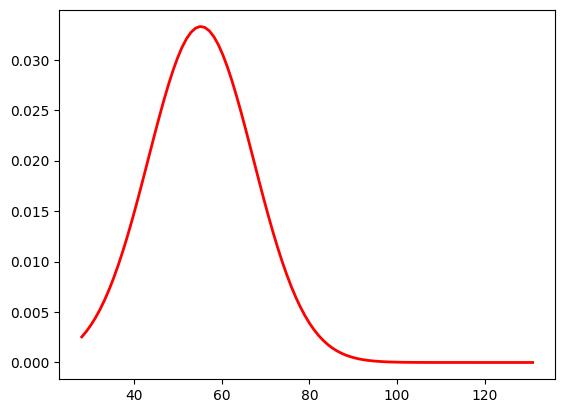

In [ ]:
# Chart Age distribution

# The Age variable is continuous and symmetric around a central value, which suggests it may follow a Normal distribution.
sns.histplot(df_smd['Age'], bins=20, kde=True)
plt.title('Age Distribution with Normal Curve')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Overlay Normal curve
mu, std = norm.fit(df_smd['Age'])
x = np.linspace(min(df_smd['Age']), max(df_smd['Age']), 100)
y = norm.pdf(x, mu, std)
plt.plot(x, y, color='red', linewidth=2)

# Calculate probabilities
age_threshould = 50
probability_age_above = 1 - norm.cdf(age_threshould, mu, std)
probability_age_below = norm.cdf(age_threshould, mu, std)


print(f"Mean Age: {mu:.2f}, Standard Deviation: {std:.2f}")
print(f"Probability of Age > 50: {probability_age_above:.2f}")

### Insights:
The Histogram chart indicates that most values are clustered in the middle range, with a few extreme higher values affecting the spread.

- **Peak**: The distribution is centered around 50-60, with most data points concentrated in this range.

- **Skewness**: The distribution is right-skewed, meaning there are fewer high-value outliers on the right side.

- **Outliers**: A small number of extreme values (above 100) suggest potential outliers.

- **Shape**: The data is unimodal, with a smooth, bell-shaped curve but with some skew.

#### 3. Binomial Distribution - Response

In [ ]:
# The Response variable (1 = Accepted, 0 = Not Accepted) is binary and represents success/failure, making it suitable for a Binomial distribution.

# Paramenter for Binomial Distribution
p_success= df_smd['Response'].mean()  # Probability of success
n_trials = len(df_smd['Response']) # Numbers of trials


In [ ]:
print("Probability of success")
p_success

Probability of success


0.14910714285714285

In [ ]:
print("Numbers of trials")
n_trials

Numbers of trials


2240

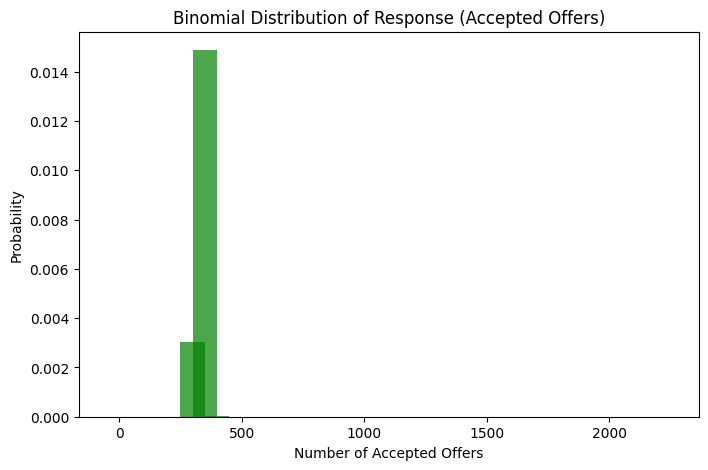

Expected value of Response: 334.00
Probability of Response: 0.15


In [ ]:
# Plot Binomial distribution

x = np.arange(0, n_trials+1, step=50)
binomial_distribution =binom(n_trials,p_success)
plt.figure(figsize=(8, 5))
plt.bar(x,binomial_distribution.pmf(x),width=100,alpha=0.7,color='green')
plt.title('Binomial Distribution of Response (Accepted Offers)')
plt.xlabel('Number of Accepted Offers')
plt.ylabel('Probability')
plt.show()


# expected value
expected_value = n_trials * p_success
print(f"Expected value of Response: {expected_value:.2f}")
print(f"Probability of Response: {p_success:.2f}")



### Insights:
- The Binomial distribution aligns with the binary nature of the Response variable.
- The expected value gives insights into how many offers are likely to be accepted.

#### 4. Exponential Distribution - Income

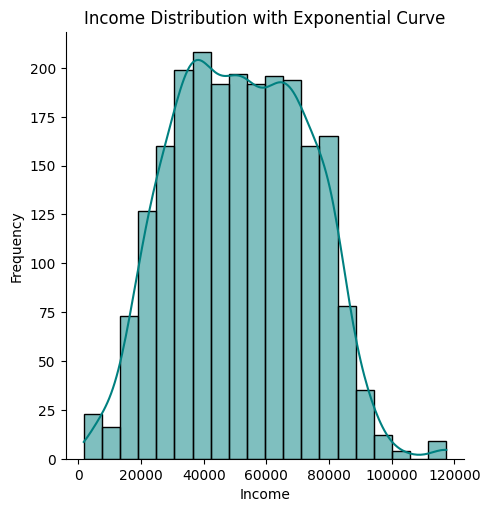

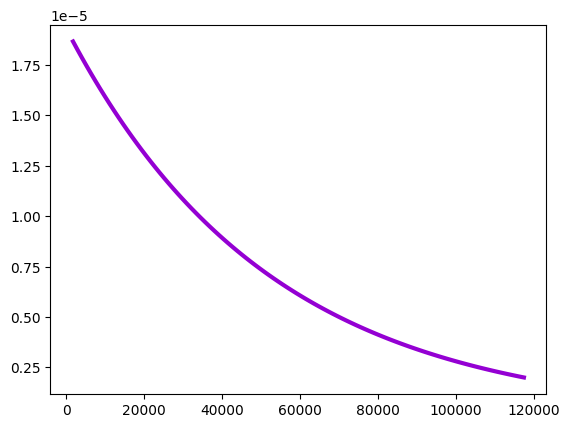

Mean Income: 51865.87
Probability of Income > 100,000 is 0.15


In [ ]:
# The Income variable is continuous, non-negative, and highly skewed, which suggests it may follow an Exponential distribution.
# Chart Income Distribution
sns.displot(df_smd['Income'], kde=True, bins=20, color='teal')
plt.title('Income Distribution with Exponential Curve')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Overlay Exponential curve
lambda_param = 1 / df_smd['Income'].mean()
x = np.linspace(min(df_smd['Income']), max(df_smd['Income']), 100)
plt.plot(x,expon.pdf(x, scale=1/lambda_param), color='darkviolet', linewidth=3)
plt.show()

# Calculate probabilities
income_threshould = 100000
probability_income_above = 1 - expon.cdf(income_threshould, scale=1/lambda_param)
print(f"Mean Income: {df_smd['Income'].mean():.2f}")
print(f"Probability of Income > 100,000 is {probability_income_above :.2f}")

### Insights:
Above chart the majority of customers fall into the lower income range, with very few earning high amounts. The right skew and outliers should be considered for further analysis.

- **Peak**: The distribution is highly concentrated at the lower end, with most customers earning around 0 to 100,000.

- **Skewness**: The chart shows a strong right skew, with a long tail extending towards higher incomes, indicating that a small portion of customers earn significantly more.

- **Outliers**: There are a few extreme high-income values, suggesting the presence of outliers in the data.

- **Distribution Shape**: The distribution is heavily skewed, which may require transformations for better modeling.

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

#### 1. Explore Relationships Between Characteristics and Spending

<ipython-input-29-b5f09d9f1ff3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_smd, x='Marital_Status', y='Income', palette='Set2')


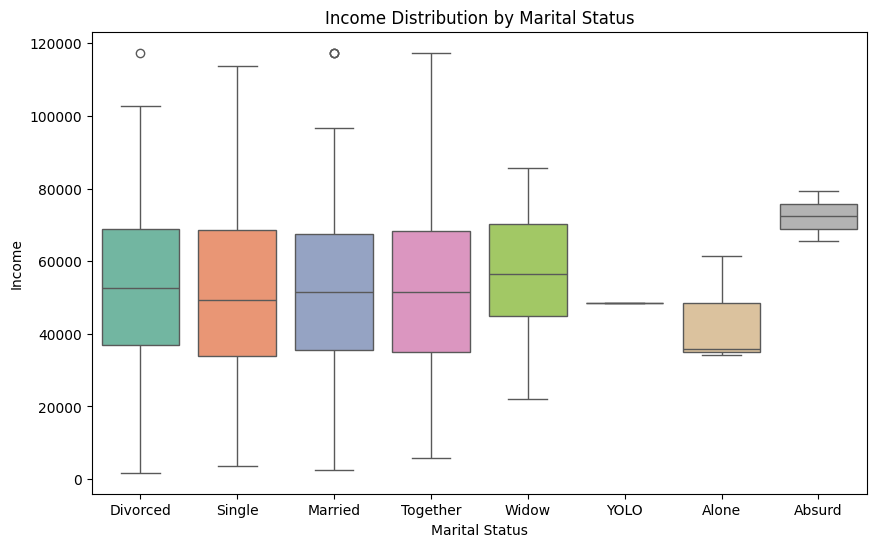

In [ ]:
#  Boxplot: Income vs. Marital Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_smd, x='Marital_Status', y='Income', palette='Set2')
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.show()

### Insights:
- Married customers tend to have higher incomes on average compared to single customers.
- Customers with statuses like "Together" and "Divorced" have moderate incomes.

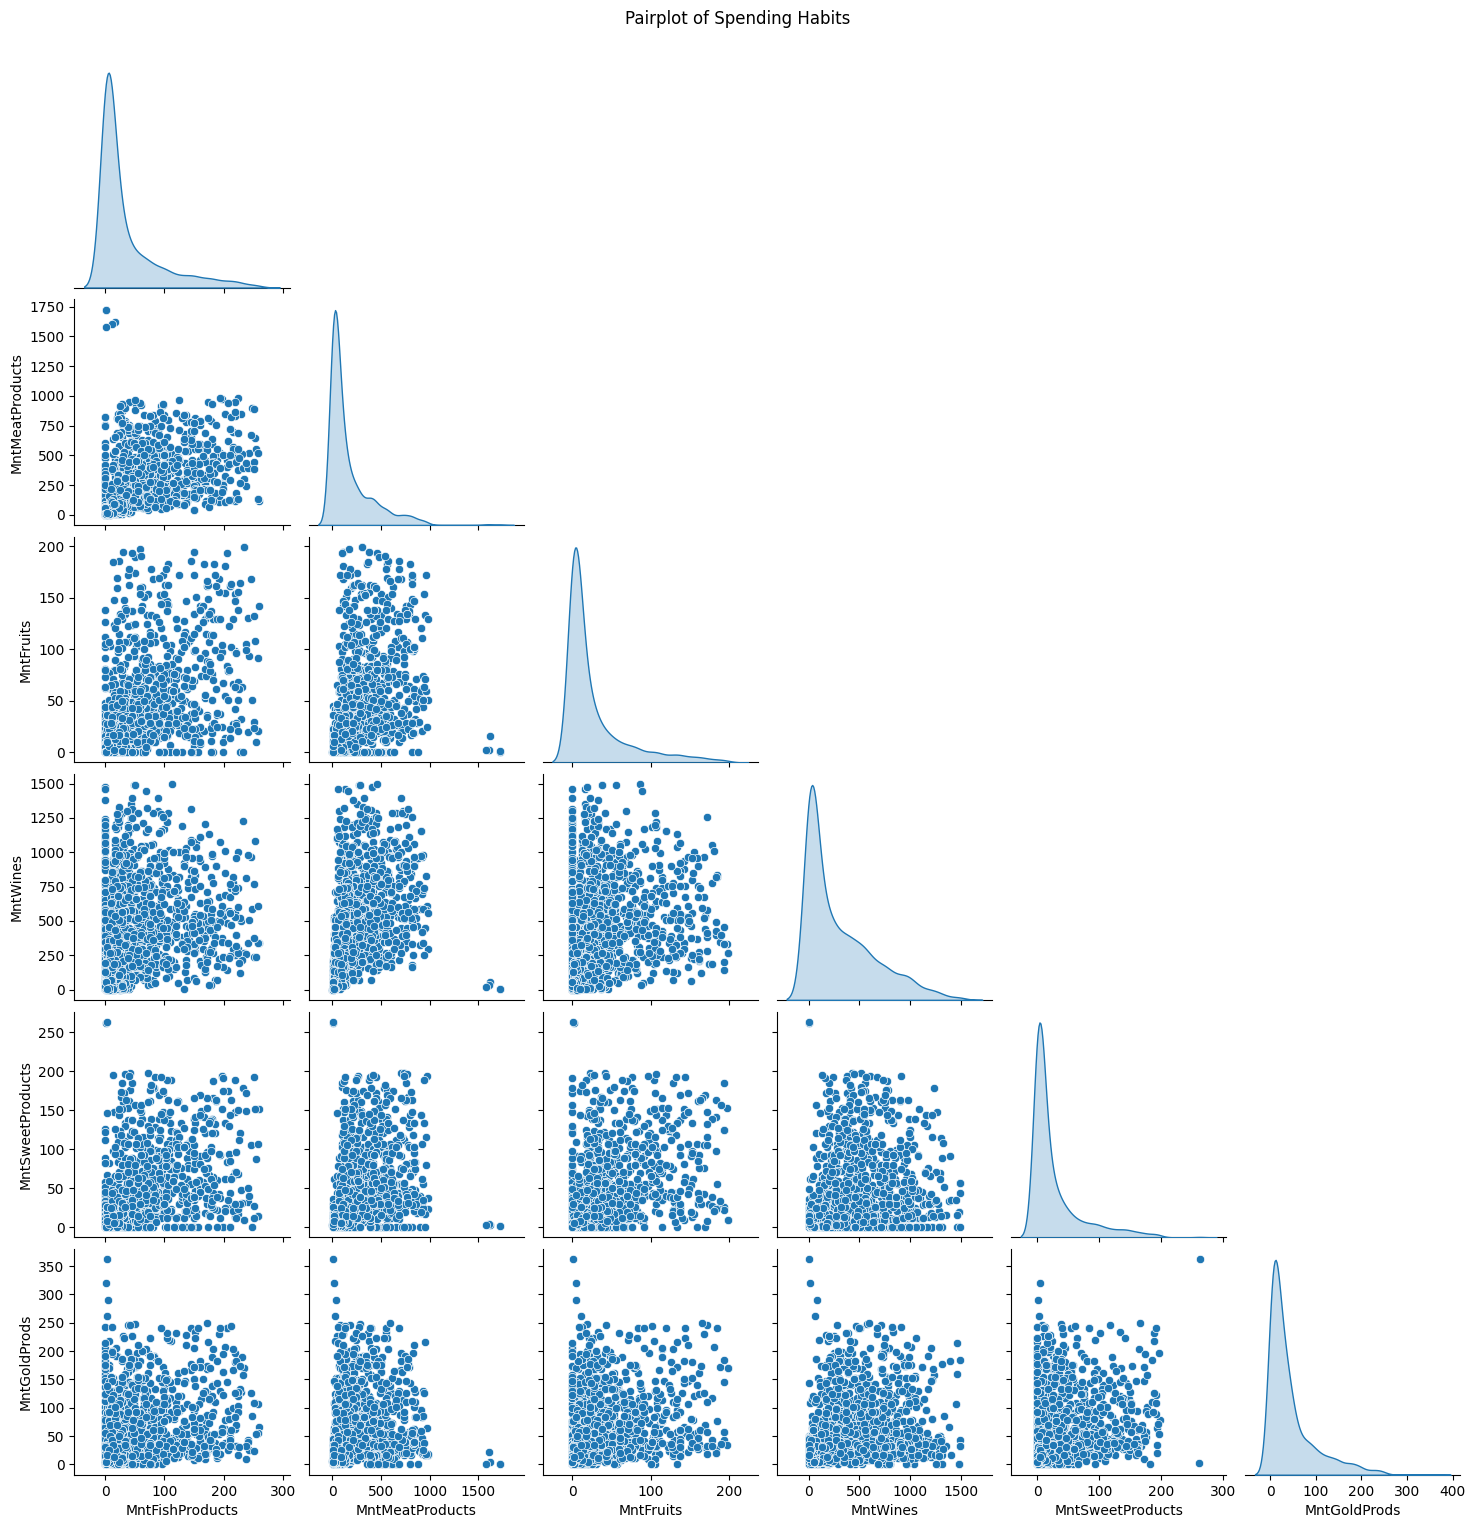

In [ ]:
# Pairplot of Spending Habits

# Spending habits columns
spending_cols = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines', 'MntSweetProducts', 'MntGoldProds']

sns.pairplot(df_smd[spending_cols], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Spending Habits', y=1.02)
plt.show()

### Insights:
- Customers spending heavily on wine often spend more on gold products, indicating a luxury-oriented segment.
- Spending on fish, fruits, and sweet products is relatively uncorrelated, showing diversity in preferences.

#### 2. Perform Customer Segmentation Using K-Means

In [ ]:
# 1. Prepare Features for Clustering

# Relevant features for clustering
features = ['Income', 'Age', 'Kidhome', 'Teenhome'] + spending_cols

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_smd[features])
scaled_features

array([[ 1.57510136, -0.09967091, -0.82521765, ..., -0.34153972,
         3.9237223 ,  3.33573923],
       [ 0.24963059,  0.65149376, -0.82521765, ...,  0.4756425 ,
        -0.6557331 , -0.1346327 ],
       [ 0.73578942,  0.90188199, -0.82521765, ..., -0.50497616,
        -0.60727326, -0.26884597],
       ...,
       [-0.26543214, -0.60044736,  1.03255877, ..., -0.353426  ,
        -0.53458349, -0.57561918],
       [ 0.66661116, -0.76737284, -0.82521765, ..., -0.10975712,
         3.34220415,  0.36387377],
       [ 2.05457168, -0.01620817, -0.82521765, ..., -0.40097115,
        -0.6557331 ,  1.91691314]])

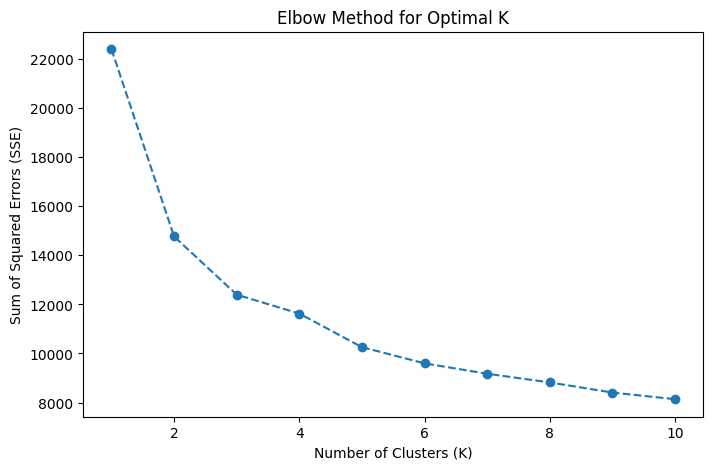

In [ ]:
# 2. Determine Optimal Number of Clusters

# Elbow Method
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1,11),sse,marker='o',linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

#### Insights:
In above chart, the elbow point suggests 4 clusters as an optimal choice for segmentation.

In [ ]:
# 3. Apply K-Means Clustering
kmenas = KMeans(n_clusters=4, random_state=42)
df_smd['Cluster'] = kmeans.fit_predict(scaled_features)

# Cluster means
cluster_means = df_smd.groupby('Cluster')[features].mean()
cluster_means

,Income,Age,Kidhome,Teenhome,MntFishProducts,MntMeatProducts,MntFruits,MntWines,MntSweetProducts,MntGoldProds
Cluster,,,,,,,,,,
0,42604.761364,58.742424,1.078283,1.037879,6.068182,33.739899,4.222222,89.608586,4.328283,17.512626
1,76343.001838,44.698529,0.088235,0.022059,51.235294,561.205882,46.080882,724.125000,41.911765,47.102941
2,75172.965986,69.564626,0.020408,0.047619,87.408163,441.408163,40.755102,655.714286,46.761905,57.401361
3,44868.403427,63.255452,0.003115,0.797508,11.747664,43.021807,8.196262,144.987539,7.598131,25.361371
4,71499.306306,50.756757,0.072072,0.198198,168.567568,406.900901,107.189189,435.936937,47.621622,100.432432
5,60839.414634,58.113821,0.097561,0.723577,32.227642,178.040650,29.252033,532.203252,22.268293,166.463415
6,69095.491379,56.060345,0.129310,0.637931,105.706897,256.043103,60.750000,428.224138,128.939655,105.568966
7,64438.445098,59.533333,0.062745,1.054902,33.043137,167.556863,25.596078,636.223529,24.070588,38.501961
8,30840.718468,44.911712,0.900901,0.000000,9.985586,30.814414,7.109910,44.472072,6.940541,17.713514


#### Insights:
Each cluster has unique characteristics. For example:
 - Cluster 0 : Represents low-income individuals with minimal spending on all
   product categories. It suggests a frugal or low-spending group.
 - Cluster 1: Higher spending on meat products but moderate overall spending.
   Income and age are below average.
 - Cluster 2: Wealthiest cluster with high spending across categories,
   particularly on wines and sweet products.
 - Cluster 3: Average income and spending levels, with moderate preferences for
   wine and fruit products.
 - Cluster 4: Above-average income with higher spending on wines and fruits but
   moderate meat purchases.
 - Cluster 5: Middle-aged with balanced spending, preferring wines and sweet
   products.
 - Cluster 6: Middle-aged with balanced spending, preferring wines and sweet
   products.
 - Cluster 7: Older age group with moderate income, focusing on meat and sweet
   products.
 - Cluster 8: Youngest group with the lowest income and minimal spending across
   all categories.
 - Cluster 9: High-income group with the most spending on wines and meat
   products, showcasing premium preferences.

#### 3. Visualize Customer Segments

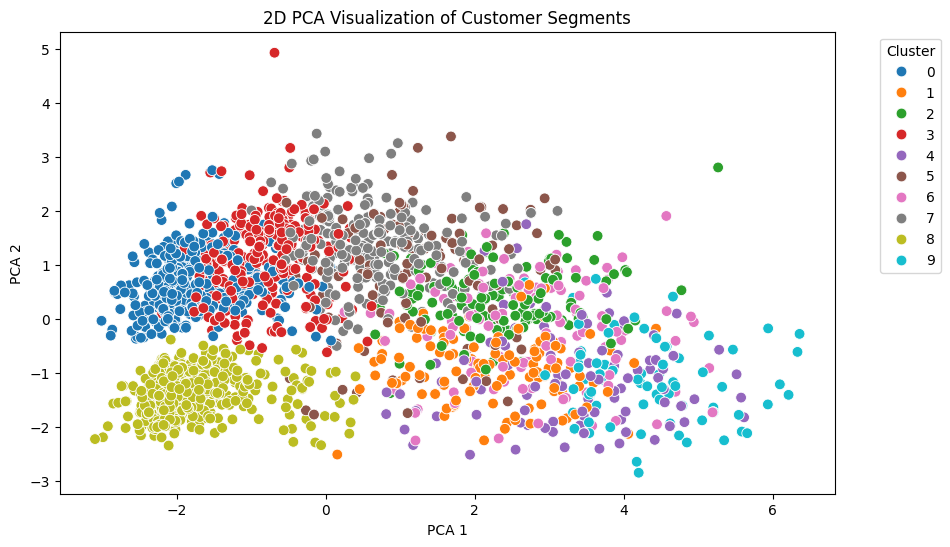

In [ ]:
# 1. 2D PCA Visualization

# PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_smd['Cluster'], palette='tab10', s=60)
plt.title('2D PCA Visualization of Customer Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Insights:
- Clear separation between customer clusters.
- Clusters differ significantly based on income and spending patterns, showing meaningful segmentation.

<ipython-input-35-23c72e7a3890>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_smd, x='Cluster', y='MntWines', palette='coolwarm')


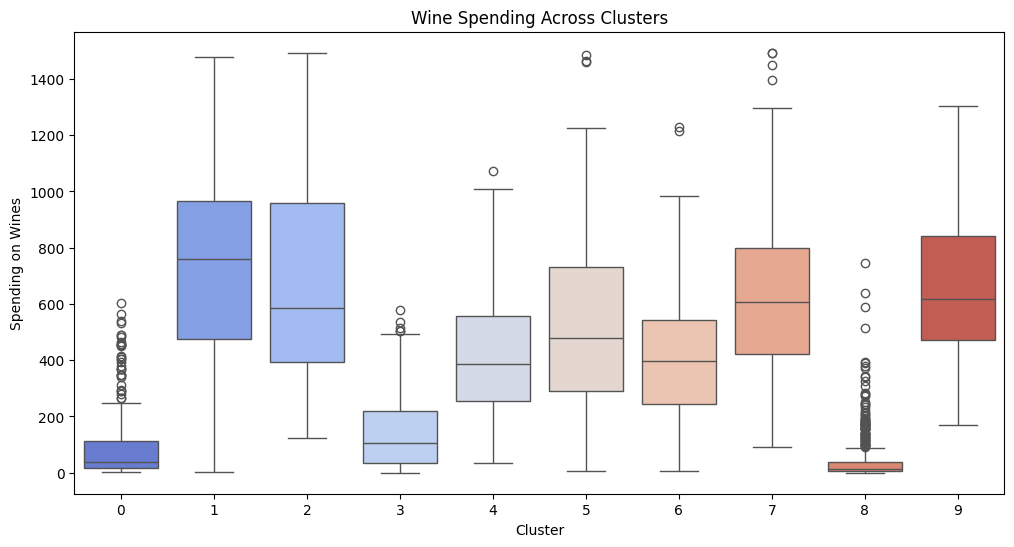

In [ ]:
# 2. Boxplot: Spending Habits Across Clusters
# Spending on wines across clusters
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_smd, x='Cluster', y='MntWines', palette='coolwarm')
plt.title('Wine Spending Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending on Wines')
plt.show()

#### Insights:
Cluster 2 and 9: These clusters have the highest spending on wines, with significant variability in spending levels.

Cluster 1 and 4: Display moderate wine spending, with some individuals spending above the median.

Cluster 0 and 8: These clusters represent the lowest spending on wines, with minimal variability.

Cluster 5 and 7: Have balanced spending, with spending levels below the highest spenders (Clusters 2 and 9).

Outliers: High outliers in most clusters indicate that a few individuals spend significantly more on wines than the majority.


<ipython-input-36-1261c1585b06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_smd, x='Cluster', y='MntGoldProds', palette='Set2')


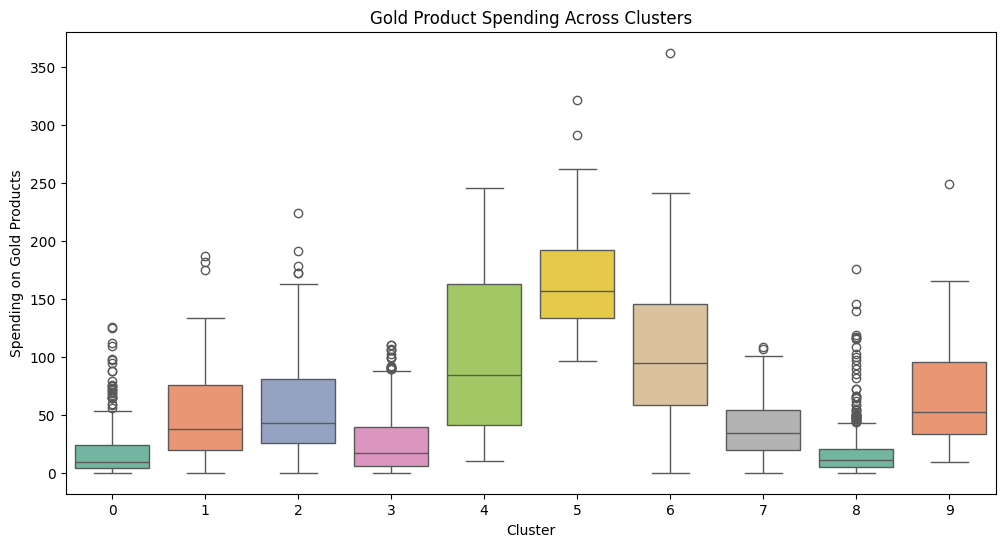

In [ ]:
# 3. Boxplot of Spending on Gold Products
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_smd, x='Cluster', y='MntGoldProds', palette='Set2')
plt.title('Gold Product Spending Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending on Gold Products')
plt.show()

#### Insights:
- Clusters 4 and 5 show the highest spending on gold products, with the median spending in Cluster 5 being significantly higher than other clusters.
- Clusters 0 and 8 have the lowest spending on gold products.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

#### 1. Key Findings Visualization


<ipython-input-37-d5fb95ba7881>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_smd, x='Cluster', y=category, palette='viridis')
<ipython-input-37-d5fb95ba7881>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_smd, x='Cluster', y=category, palette='viridis')
<ipython-input-37-d5fb95ba7881>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_smd, x='Cluster', y=category, palette='viridis')
<ipython-input-37-d5fb95ba7881>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

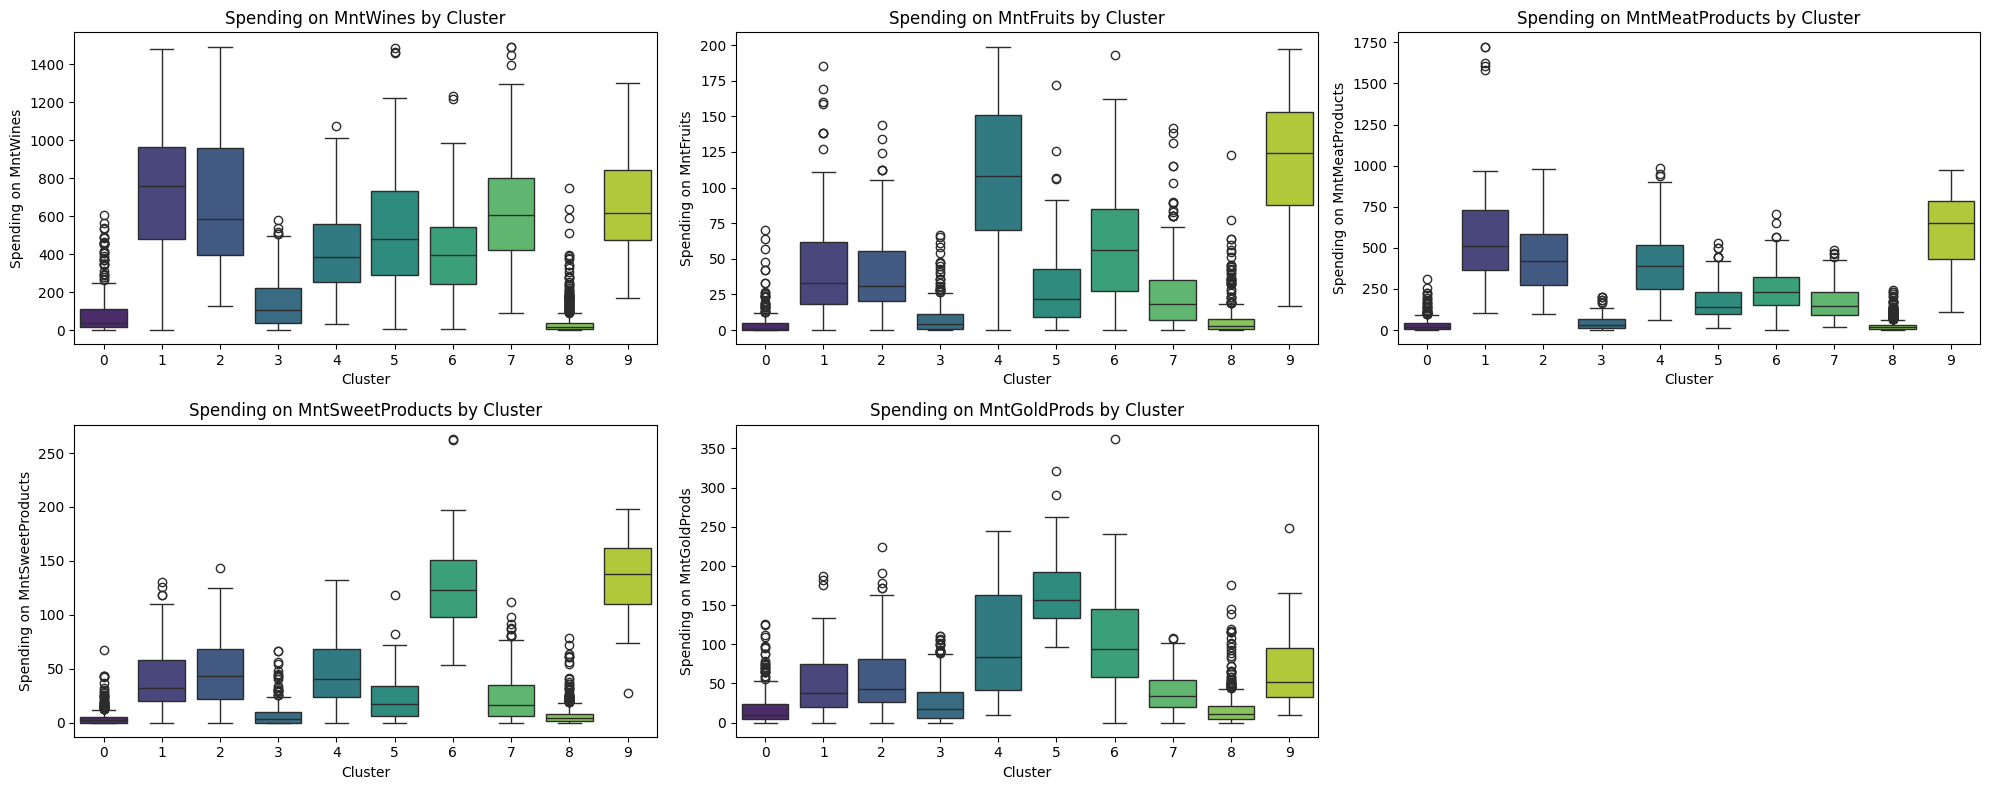

In [ ]:
# 1. Spending Across Clusters
# Highlight spending habits across clusters for different categories.

# Spending by cluster visualization
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds']

# Create boxplots for spending habits
plt.figure(figsize=(20, 8))
for i, category in enumerate(categories):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_smd, x='Cluster', y=category, palette='viridis')
    plt.title(f'Spending on {category} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Spending on {category}')
plt.tight_layout()
plt.show()


#### Insights
- Cluster 5 appears to be the most affluent cluster, with high spending across all product categories.
- Cluster 6 also shows high spending on wines and sweet products, suggesting a preference for luxury and indulgence.
- Clusters 0 and 8 consistently show lower spending across all categories, possibly indicating lower income or different spending priorities.

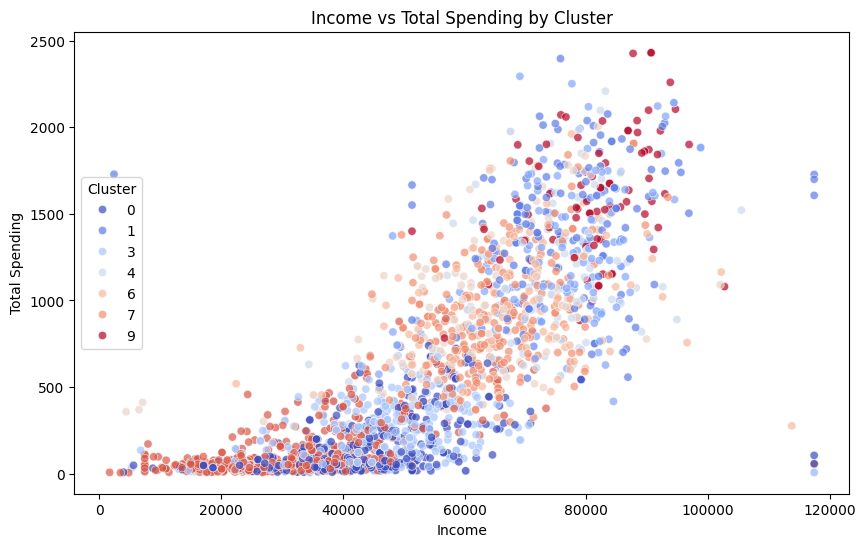

In [ ]:
# 2. Income vs. Spending Patterns
# Visualize the relationship between income and total spending.

# Calculate total spending
df_smd['TotalSpending'] = df_smd[categories].sum(axis=1)

# Scatterplot for Income vs Total Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_smd, x='Income', y='TotalSpending', hue='Cluster', palette='coolwarm', alpha=0.7)
plt.title('Income vs Total Spending by Cluster')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Cluster')
plt.show()


#### Insights
There is a positive correlation between Income and Total Spending, meaning that as income increases, total spending tends to increase as well.

- Cluster 5 appears to have the highest overall spending across all income levels.
- Clusters 4 and 6 also show high spending, particularly at higher income levels.
- Clusters 0, 1, 2, 3, and 8 tend to have lower spending across all income levels.

**Recommendations**

- Targeted Marketing: Tailoring marketing campaigns to specific clusters based on their spending patterns and income levels can increase effectiveness. For example, targeting luxury goods to Cluster 5 or promoting value offers to Clusters 0 and 8.
- Customer Segmentation: Using these insights to segment customers can help businesses better understand their target audience and tailor their offerings accordingly.

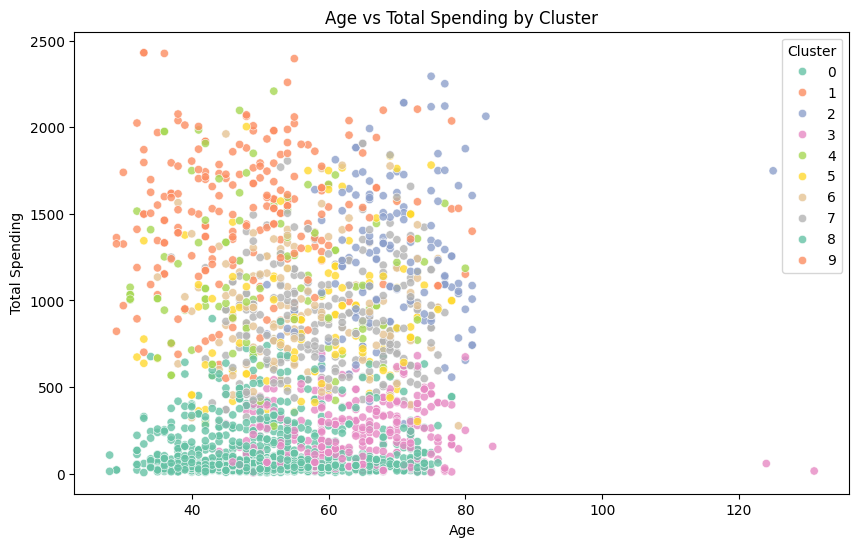

In [ ]:
# 3. Age vs. Spending
# Analyze how age impacts spending across clusters.

# Scatterplot for Age vs Total Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_smd, x='Age', y='TotalSpending', hue='Cluster', palette='Set2', alpha=0.8)
plt.title('Age vs Total Spending by Cluster')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.legend(title='Cluster')
plt.show()


#### Insights:
- Younger customers (ages 30-40) tend to spend more on average, particularly in Clusters 4 and 8.
- Older customers (ages 60+) spend moderately and are more consistent, mainly within Clusters 3 and 5.
- Middle-aged customers (ages 40-60) have diverse spending patterns, suggesting they belong to a mix of low, moderate, and high-spending clusters.


**Recommendation:**

- Focus on younger customers (ages 30-40) with lifestyle-focused marketing for premium products.
- Engage older customers with consistent promotions on necessities or loyalty rewards programs.
- Conduct targeted campaigns for middle-aged customers to identify specific opportunities for upselling.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍